In [7]:
import pandas as pd #Manipulación de datos
import os #Manejo de Archivos Drive

In [8]:
import sys

if 'google.colab' in sys.modules:
  from google.colab import drive
  drive.mount('/content/drive')
  dir = '/content/drive/MyDrive/ESIS_2024/7mo_semestre/Analitica_Datos/UNID02/TrabajoUnidad02/Data/bank'
else:
  dir = './Data/bank/'
  
os.listdir(dir)

['bank-names.txt',
 'bank.csv',
 'bank-full.csv',
 'bank-full.xlsx',
 'bank-full-trad.xlsx',
 'bank-full-trad-num.xlsx']

In [9]:
archivo = f'{dir}bank-full-trad-num.xlsx'
df = pd.read_excel(archivo, sheet_name='bank-full')

In [10]:
df.head()

,edad,trabajo,estado_civil,educacion,incumplimiento,balance,pres_vivienda,pres_personal,contacto,dia,mes,duracion_seg,campania,pdias,anterior,presultado,y
0,58,5.0,2,3,0,2143,1,0,0,5,5,261,1,-1,0,0,0
1,44,10.0,1,2,0,29,1,0,0,5,5,151,1,-1,0,0,0
2,33,3.0,2,2,0,2,1,1,0,5,5,76,1,-1,0,0,0
3,47,7.0,2,0,0,1506,1,0,0,5,5,92,1,-1,0,0,0
4,33,0.0,1,0,0,1,0,0,0,5,5,198,1,-1,0,0,0


## 2. Seleccionamos las variables

In [11]:
covariables = df.drop(columns=['y'])
objetivo = df['y']

## 3. Entrenamiento del Árbol de decisión

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test = train_test_split(covariables, objetivo, test_size=0.25, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(33908, 16) (11303, 16) (33908,) (11303,)


In [34]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=4)

In [35]:
model.fit(X=x_train, y=y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [36]:
# Predicción
model_pred = model.predict(x_test)

### Precision del modelo

In [37]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Precision del modelo:", metrics.accuracy_score(y_test, model_pred))

Precision del modelo: 0.891090860833407


## 4. Visualizar Módelo

In [38]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

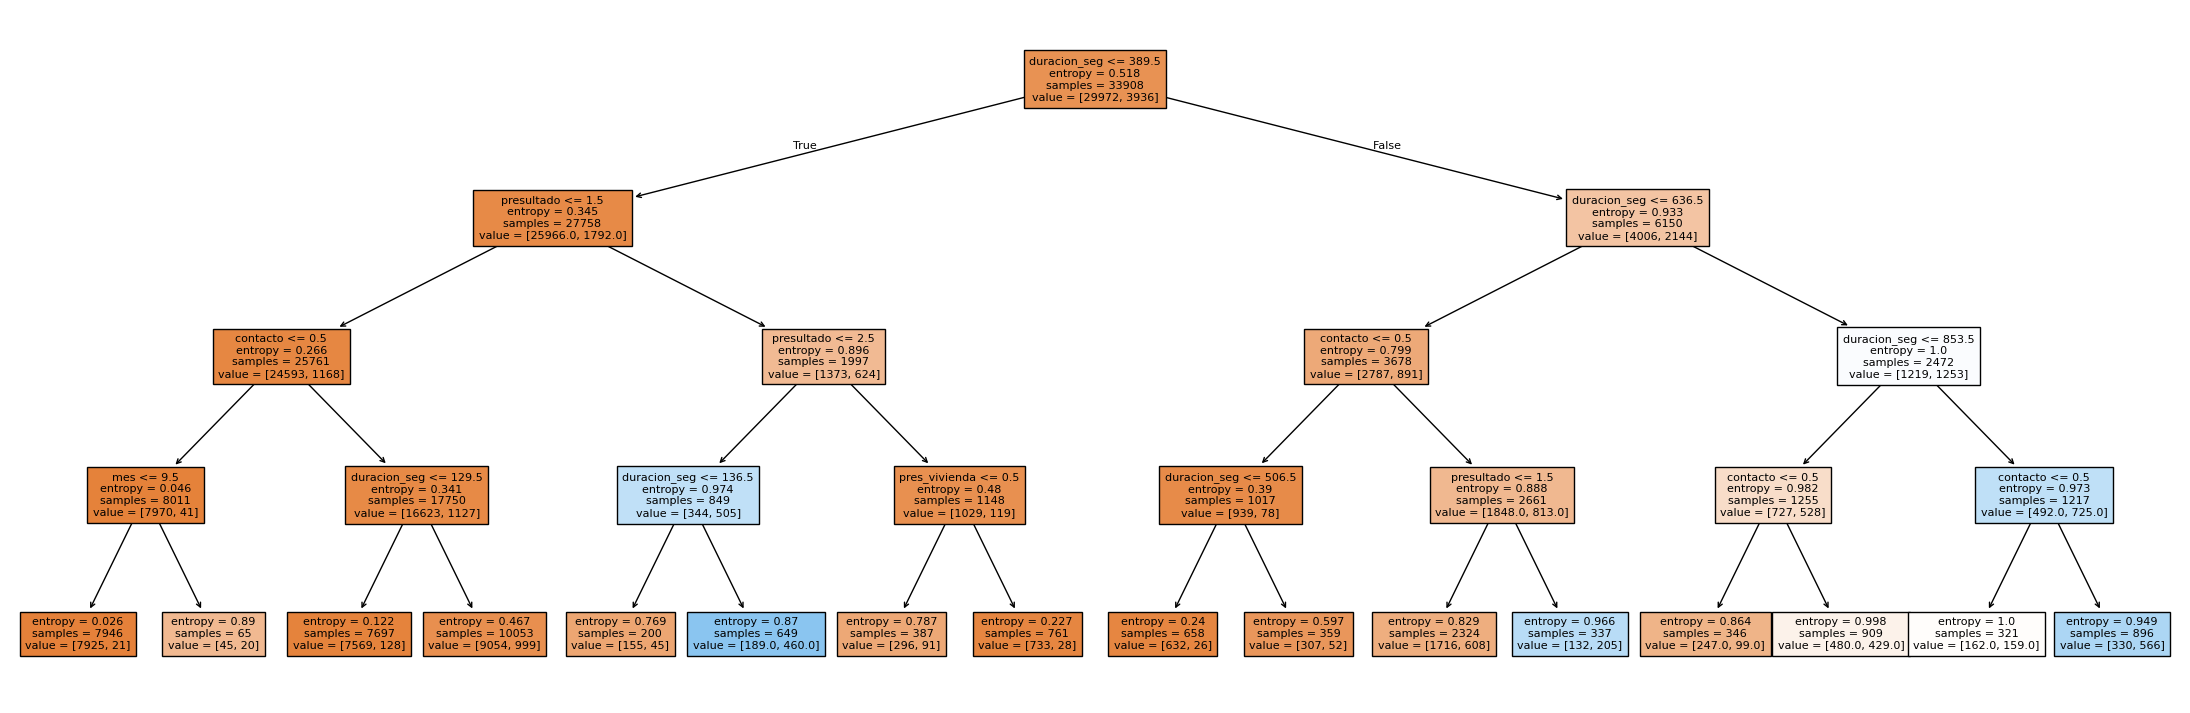

In [39]:
plt.figure(figsize=(28, 9))
plot_tree(decision_tree=model, feature_names=x_train.columns, filled=True, fontsize=8);

 ## 5. Evaluacion de prediccion

In [40]:
y_pred = model.predict(covariables)
df['y_pred'] = y_pred

In [41]:
df.sample(10)[['y','y_pred']]

,y,y_pred
31479,0,0
35202,0,0
44506,1,1
30812,0,0
1995,0,0
25513,0,0
8686,0,0
13060,0,0
8467,0,0
38343,0,0


In [42]:
(df['y'] == df['y_pred']).mean()

0.8985423901262967

In [43]:
len(df[ df['y']!= df['y_pred'] ]) ## en 4423 datos falla el algoitmo

4587